In [153]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import numpy as np
from datetime import timedelta, datetime, date

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

from values import Values
from tasks import Tasks
from time_sheet import TimeSheet
from advice import Advice
from locks import Locks
import general_tools as tls

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
v = Values()
t = Tasks()
ts = TimeSheet()

In [159]:
a = Advice(True)
a.sample()

,value_id,task,entry,task_id,goal_min,goal_max,points,deficit,excess,opportunity,deficit_points,excess_points,opportunity_points
17,4,probability,0.0,4,3.0,6.0,1.0,3.0,0,6.0,3.0,0.0,6.0


In [186]:
ts.add_entry(6, 'musing',1, '2020-05-23')
a = Advice(True)

In [187]:
a.print_deficits()

,value_id,task,entry,task_id,goal_min,goal_max,points,deficit,excess,opportunity,deficit_points,excess_points,opportunity_points
3,4,ml,3.0,2,9.00,18.0,1.25,6.00,0.0,15.0,7.50,0.0,18.75
16,4,leetcode,0.0,3,6.00,9.0,1.00,6.00,0.0,9.0,6.00,0.0,9.00
18,4,stats,0.0,5,3.00,9.0,1.25,3.00,0.0,9.0,3.75,0.0,11.25
1,3,the book,2.0,1,4.00,8.0,1.50,2.00,0.0,6.0,3.00,0.0,9.00
17,4,probability,0.0,4,3.00,6.0,1.00,3.00,0.0,6.0,3.00,0.0,6.00
20,2,startup,0.0,2,1.00,4.0,1.50,1.00,0.0,4.0,1.50,0.0,6.00
8,1,muscles,0.0,2,1.00,2.0,1.50,1.00,0.0,2.0,1.50,0.0,3.00
19,4,startup,0.0,6,1.00,4.0,1.25,1.00,0.0,4.0,1.25,0.0,5.00
13,3,intake,0.0,2,1.00,4.0,1.00,1.00,0.0,4.0,1.00,0.0,4.00
15,5,find new inspiration,0.0,2,0.50,2.0,1.50,0.50,0.0,2.0,0.75,0.0,3.00


total deficit: 25.08


In [183]:
ts[1]

,datestr,value_id,task,entry,points
0,2020-05-26,1,light cardio,1.00,0.75
8,2020-05-25,1,light cardio,3.00,2.25
15,2020-05-21,1,light cardio,1.00,0.75
19,2020-05-20,1,light cardio,1.00,0.75
23,2020-05-19,1,light cardio,1.00,0.75
27,2020-05-18,1,light cardio,3.00,2.25
34,2020-05-16,1,cardio,0.10,0.10
35,2020-05-16,1,light cardio,1.00,1.00
40,2020-05-15,1,muscles,0.50,0.50
41,2020-05-15,1,light cardio,1.00,1.00


In [140]:
a.propose_next()


        Should you do Career. ml perhaps?
        Deficit: 8.75 (7.0 hours),
        Opportunity: 20.0 (16.0 hours)
        sure
Okay. Let's do it!


In [151]:
def bar_plot_actual_vs_goals(actual,ax=None):
    x = actual.value_id.apply(str) + '.' + actual.task
    if not ax:
        f, ax = plt.subplots(figsize=(14, 8))
    ax.bar(x,
            (actual.goal_max - actual.goal_min), color='C0',
          label='planned: {} - {} h/w'.format(actual.goal_min.sum(), actual.goal_max.sum()))
    ax.step(x,
             actual.entry - actual.goal_min,
             c='k', where='mid',
             label='actual: total {} h/w'.format(round(actual.entry.sum(), 2)))
    no_work = actual[(actual.entry == 0) & (actual.goal_min > 0)]
    nw_x = no_work.value_id.apply(str) + '.' + no_work.task
    ax.scatter(nw_x,
               [-0.2]*nw_x.shape[0], 
                   c='r', 
                   s=50, 
                   label='actual=0')

    ax.tick_params(axis='x', rotation=90);
    ax.set_ylabel('difference with mean of planned')
    ax.grid(axis='y')
    ax.legend()

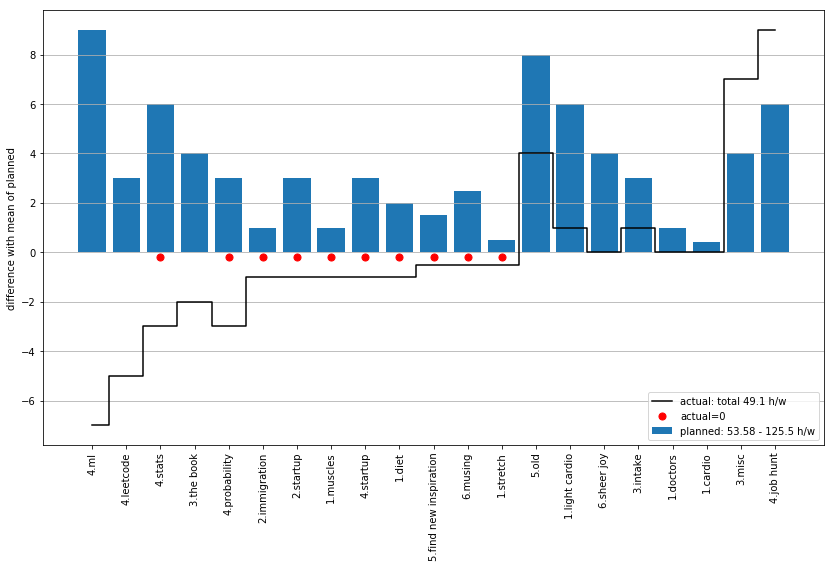

In [152]:
bar_plot_actual_vs_goals(a.table,ax=None)